# <center> Universidad Politécnica de Yucatán </center>
# <center> ![logoupy](https://static.wixstatic.com/media/e16f80_45021b575f1c40cf9102e482464cb4ea~mv2_d_3000_2100_s_2.png/v1/fill/w_560,h_394,al_c,q_85,usm_0.66_1.00_0.01/e16f80_45021b575f1c40cf9102e482464cb4ea~mv2_d_3000_2100_s_2.webp)
## <center> Supervise Learning </center>
<center><h2>Data 7A</h2></center>
<center><h2>Team:</h2></center>
<center><strong>
<li>Adrian Roberto Carmona Rodriguez</li>
<li>Alfredo Alexander Paz Martínez</li>
<li>Pedro Alejandro Uican díaz</li>
<li>Karla Patricia Valdez Echeverria</li>
<li>Emmanuel Alejandro Hurtado Alejandre</li>
</strong></center>


# Multivariate Linear Regression

In this assignment, you will implement multivariate linear regression to predict the price of houses based on its characteristics.

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. The file houses.csv contains a training set of housing prices in the city of Valladolid. The first column is the size of the house (in square feet), the second column is the number of bedrooms and the third column is the price of the house. Dataset is like below:

| Size of the house (in square feet) | Number of bedrooms | Price of the house |
|------------------------------------|--------------------|--------------------|
| 2104                               | 3                  | 399900             |
| 1600                               | 3                  | 329900             |
| 2400                               | 3                  | 369000             |


You should fit a multivariate linear regression model using size and bedrooms as variables to predict the price:
* Plot scatterplot of the two variables against price
* Use Scikit-learn to fit the model
* Compute the parameters with the normal equations using np.linalg.inv()
* Compute the parameters with the pseudo-inverse using np.linalg.pinv()
* Plot the fitted surface obtained with any of the previous methods

After that, you should implement the gradient descent algorithm to train a multivariate linear regression model. Try to fit the model with gradient descent and describe the results.

Note that you should standardize the values of the input variables, substracting the mean and dividing by the standard deviation.

For gradient descent you should consider the following:

* Define a variable for the learning rate $\alpha$ and try with a default value of 0.01.
* Define a maximum number of iterations with 5000 as default.
* Initialize ${\theta}$ with random values or zeros.
* Plot J as a function of time (iterations).

Finally you should implement stochastic and mini-batch gradient descent and compare results.

In [1]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# Read csv
data = pd.read_csv("houses.csv", names= ["size",'rooms',"price"])
data.head()

,size,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


---
### 0. Data Standarization

In [3]:
# Method to standarize data
def feature_stand(X):
    
    #Note here we need mean of indivdual column here, hence axis = 0
    mu = np.mean(X, axis = 0)  
    
    # Notice the parameter ddof (Delta Degrees of Freedom)  value is 1
    sigma = np.std(X, axis= 0, ddof = 1)  # Standard deviation
    
    X_stand = (X - mu)/sigma
    
    return X_stand, mu, sigma

In [4]:
# Pass DataFrame to numpy array to normalize X matrix
x_stand = data.to_numpy()

# Standarize input Matrix X
x_stand, mu, sigma = feature_stand(x_stand)

# x_stand to DataFrame to get X 
df = pd.DataFrame(x_stand)

# Separate data in vectorized form 
X = df.iloc[:,0:-1].to_numpy()

# Get vector Y without standarization
y_data = data.iloc[:,-1].to_numpy().reshape(-1, 1)

In [5]:
# Standarized Matrix X
X[:5]

array([[ 0.13000987, -0.22367519],
       [-0.50418984, -0.22367519],
       [ 0.50247636, -0.22367519],
       [-0.73572306, -1.53776691],
       [ 1.25747602,  1.09041654]])

In [6]:
# Convert to thousand dollar for convenience
Y = y_data / 1000

In [7]:
# Vector y
Y[:5]

array([[399.9],
       [329.9],
       [369. ],
       [232. ],
       [539.9]])

In [8]:
# Matrix X with ones column 
X_1 = np.c_[np.ones(X.shape[0]),X]

### Plot scatterplot of the two variables against price

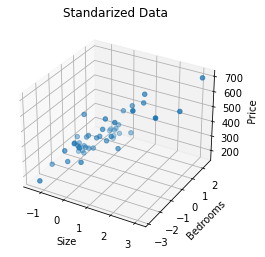

In [9]:
# Ploting Data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
ax.set_title("Standarized Data")
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
plt.show()

---
### SGDRegressor Scikit-learn

In [10]:
lr = SGDRegressor(max_iter=500, eta0 = 0.01, fit_intercept = False) #tol=0.001
lr.fit(X_1,Y.ravel())
print(lr.coef_)

[340.29570649 110.09924881  -6.16418425]


### LinearRegression Scikit-learn

In [11]:
lr_2 = LinearRegression(fit_intercept = False)
lr_2.fit(X_1, Y)
print(lr_2.coef_)

[[340.41265957 110.63105028  -6.64947427]]


$\hat{y} = 340.4127 + 110.6310x_1 - 6.6495x_2$

---
### Closed-form MLR

The closed-form solution of Multivariate Linear Regression is:

$$ \hat{\theta} = ( {X}^T{X})^{-1} {X}^T {y}$$

- This equation gives us directly the values of $\hat{\theta} $ that minimizes the cost function.
- May not work if $({X}^T X)$ is not invertible (sigular), as if $m$ < $n$ or some features are rendundant.

In [12]:
# MLR with Normal Equations
theta_hat = np.linalg.inv(X_1.T@X_1)@X_1.T@Y
print(theta_hat)

[[340.41265957]
 [110.63105028]
 [ -6.64947427]]


$\hat{y} = 340.4127 + 110.6310x_1 - 6.6495x_2$

Another option (always defined) is to use the pseudoinverse ${X}^+$ obtained from the Singular Value Decomposition (SVD) in the following way:

$$\hat{\theta} = {X}^+ {y}$$

- Both are normal equations and SVD get very slow when the number of features is large (e.g. 100K).
- Gradient Decent approach can be useful when we have a larn $n$ or $m$. 

In [13]:
# MLR with pseudoinverse
t_hat = np.linalg.pinv(X_1)@Y
print(t_hat)

[[340.41265957]
 [110.63105028]
 [ -6.64947427]]


$\hat{y} = 340.4127 + 110.6310x_1 - 6.6495x_2$

### Plot the fitted surface obtained with any of the previous methods

Which result do you want to plot?
1 for np.linalg.inv()
2 for np.linalg.pinv()
1


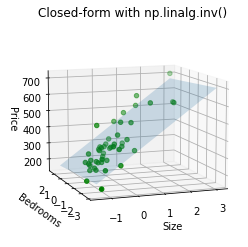

In [14]:
# Preparing data points to be plotted
Size, Bedrooms = np.meshgrid([np.min(X[:,0]),np.max(X[:,0])],[np.min(X[:,1]),np.max(X[:,1])] )     

# Menu
choice = int(input("Which result do you want to plot?\n1 for np.linalg.inv()\n2 for np.linalg.pinv()\n"))
if(choice == 1):
    Price = theta_hat[0] + theta_hat[1] * Size + theta_hat[2] * Bedrooms
    title = "Closed-form with np.linalg.inv()"
elif(choice == 2):
    Price = t_hat[0] + t_hat[1] * Size + t_hat[2] * Bedrooms
    title = "Closed-form with np.linalg.pinv()"
else:
    print("\nNot Valid Option!")
    theta = np.zeros((df.shape[1], 1))
    title = "Just Standarized Data"
    
# Plot 3D Graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, c = "green")
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title(title)
ax.plot_surface(Size,Bedrooms,Price,alpha=0.2)
ax.view_init(10,250)
plt.show()

---
### Batch Gradient Decent for MLR 

In [15]:
# Method of cost function (X without ones column)
def cost_func (theta, X, Y) :
    return np.average(np.square(Y - hypothesis(theta, X))) / 2

# Method that returns the hypothesis per epoch
def hypothesis (theta, X) :
    tempX = np.ones((X.shape[0], X.shape[1] + 1))
    tempX[:,1:] = X
    return tempX @ theta

# Method that returns the Gradient Vector 
def gradient (theta, X, Y) :
    tempX = np.ones((X.shape[0], X.shape[1] + 1))
    tempX[:,1:] = X
    d_theta = - np.average((Y - hypothesis(theta, X)) * tempX, axis= 0)
    d_theta = d_theta.reshape((d_theta.shape[0], 1))
    return d_theta

In [16]:
# Method for Batch Gradient Decent
def batch_gradient_descent (theta, X, Y, learning_rate, epochs) :
    
    # Empty array to store cost history
    cost = np.zeros(epochs)
    
    # Iterate over epochs
    for i in range(epochs):
        
        # Get gradient vector
        d_theta = gradient(theta, X, Y)
        
        # Update theta
        theta = theta - learning_rate * d_theta
        
        # Store loss value in cost history
        cost[i] = cost_func(theta, X, Y)
        
    return theta, cost

In [17]:
# Parameters Batch
b_theta = np.zeros((df.shape[1], 1))
learning_rate = 0.01 
epochs = 1500

# Perform Batch Gradient Decent 
b_theta, b_cost = batch_gradient_descent(b_theta, X, Y, learning_rate, epochs)
b_theta

array([[340.41256301],
       [110.54056655],
       [ -6.55899055]])

$\hat{y} = 340.4125 + 110.5405x_1 -6.5589x_2$

---
### MBGD variant of MLR

In [18]:
# Method for Mini-Batch Gradient Decent
def minibatch_gradient_descent (theta, X, Y, alpha, epochs, batch_size):
    
    # Empty array to store cost history
    cost = np.zeros(epochs)
    
    # Iterate over epochs
    for i in range(epochs):
        
        # Iterate over each batch 
        for j in range(0, X.shape[0], batch_size):
            
            # Get gradient vector
            d_theta = gradient (theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
            
            # Update theta
            theta = theta - alpha * d_theta
    
        # Store loss value in cost history
        cost[i] = cost_func(theta, X, Y)
            
    return theta, cost

In [19]:
# Parameters Mini-batch
mb_theta = np.zeros((df.shape[1], 1))
mb_alpha = 0.01
mb_epochs = 1500
batch_size = 16

mb_theta, mb_cost = minibatch_gradient_descent (mb_theta, X, Y, mb_alpha, mb_epochs, batch_size)
mb_theta

array([[340.12313143],
       [110.39989227],
       [ -7.37038759]])

$\hat{y} = 340.1231 + 110.3998x_1 -7.3703x_2$

### SGD variant of MLR.

In [20]:
# Method for Stochastic Gradient Decent
def stochastic_gradient_descent (theta, X, Y, alpha, epochs):
    
    # Empty array to store cost history
    cost = np.zeros(epochs)
    
    # Iterate over epochs
    for i in range(epochs):
        
        # Iterate over each row in X
        for j in range(X.shape[0]):
            
            # Get gradient vector
            d_theta = gradient (theta, X[j,:].reshape(1, X.shape[1]), Y[j,:].reshape(1, 1))
            
            # Update theta
            theta = theta - alpha * d_theta
    
        # Store loss value in cost history
        cost[i] = cost_func(theta, X, Y)
        
    return theta, cost

In [21]:
# Parameters Stochastic 
s_theta = np.zeros((df.shape[1], 1))
s_alpha = 0.01
s_epochs = 1500

s_theta, s_cost = stochastic_gradient_descent (s_theta, X, Y, s_alpha, s_epochs)
s_theta

array([[339.32732765],
       [107.61551516],
       [ -8.0487478 ]])

$\hat{y} = 339.3273 + 107.6155x_1 -8.0487x_2$

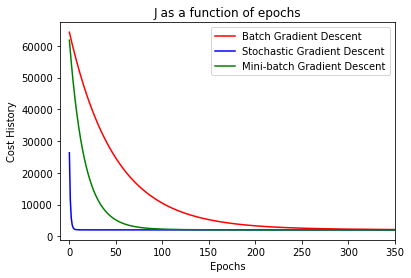

In [22]:
# Plot the cost (J)
fig, ax = plt.subplots()  
epochs = 1500
ax.plot(np.arange(epochs), b_cost, 'r')  
ax.plot(np.arange(epochs), s_cost, 'b')  
ax.plot(np.arange(epochs), mb_cost, 'g')  
ax.legend(loc='upper right', labels=['Batch Gradient Descent', 'Stochastic Gradient Descent', 'Mini-batch Gradient Descent'])
ax.set_xlabel('Epochs')  
ax.set_ylabel('Cost History')  
ax.set_title('J as a function of epochs')  
plt.xlim(-10,350)
plt.show()